In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/flipkart_reviews.csv")
print(data.head())

                                        Product_name  \
0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  Best under 60k Great performanceI got it for a...       5  
1                                 Good perfomence...       5  
2  Great performance but usually it has also that...       5  
3           My wife is so happy and best product 👌🏻😘       5  
4  Light weight laptop with new amazing features,...       5  


In [2]:
print(data.isnull().sum())

Product_name    0
Review          0
Rating          0
dtype: int64


In [3]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Review"] = data["Review"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data,
             values=quantity,
             names=numbers,hole = 0.5)
figure.show()

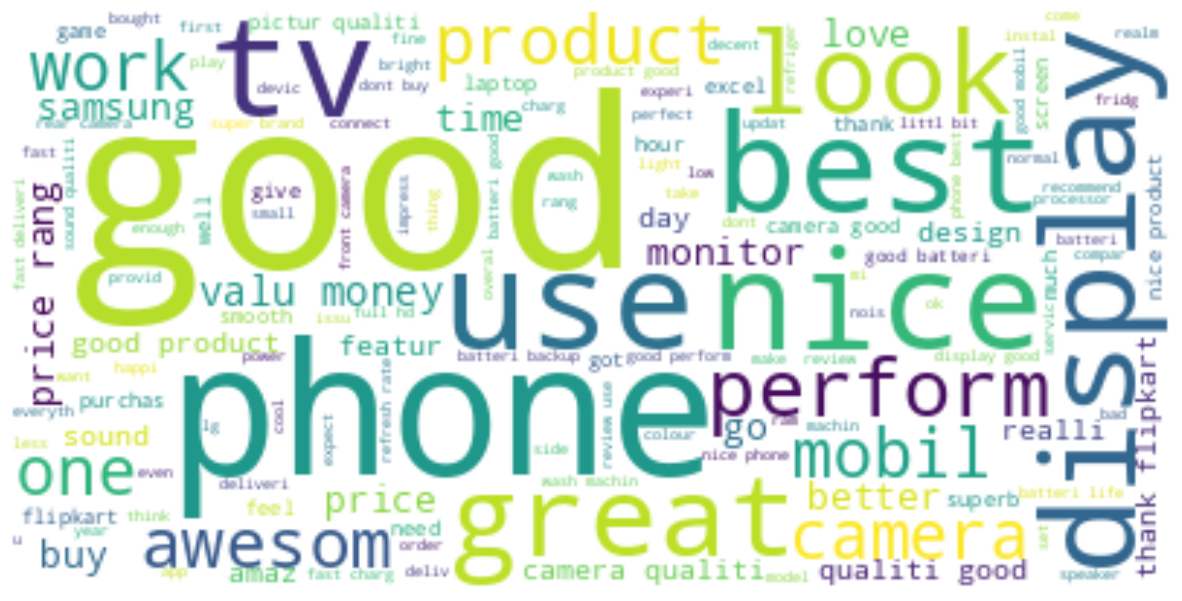

In [5]:
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              Review  Positive  Negative  \
0  best  great performancei got around  backup bi...     0.395     0.101   
1                                        good perfom     0.744     0.000   
2  great perform usual also game laptop issu batt...     0.277     0.000   
3                        wife happi best product 👌🏻😘     0.512     0.000   
4  light weight laptop new amaz featur batteri li...     0.000     0.000   

   Neutral  
0    0.504  
1    0.256  
2    0.723  
3    0.488  
4    1.000  


In [8]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [9]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  923.5529999999985
Negative:  96.77500000000013
Neutral:  1283.6880000000006


In [10]:
import pickle

# Save the SentimentIntensityAnalyzer instance
sentiments = SentimentIntensityAnalyzer()
with open("vader_sentiment_analyzer.pkl", "wb") as f:
    pickle.dump(sentiments, f)

# Save the DataFrame with sentiment scores
data.to_pickle("flipkart_sentiment_data.pkl")


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import pickle

# Load the sentiment data
data = pd.read_pickle("flipkart_sentiment_data.pkl")

# Load the original data to get the 'Rating' column
original_data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/flipkart_reviews.csv")

# ----- 1. Rating Distribution -----
# Use the original data for rating distribution
ratings = original_data["Rating"].value_counts()  # Changed to original_data
numbers = ratings.index
quantity = ratings.values

fig1 = px.pie(values=quantity, names=numbers, hole=0.5,
              title="Rating Distribution")
fig1.show()

# The rest of the code remains the same...

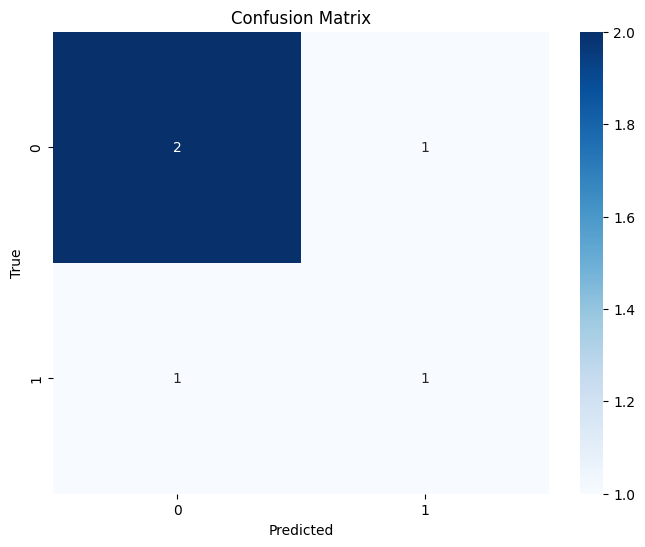

In [14]:
# prompt: code to visualize confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have 'y_true' (true labels) and 'y_pred' (predicted labels)
# Replace these with your actual true and predicted labels
# Example:
y_true = [0, 1, 0, 1, 0] # This is just an example, replace with your actual data
y_pred = [0, 0, 1, 1, 0] # This is just an example, replace with your actual data

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(set(y_true)), yticklabels=list(set(y_true))) # Assuming binary classification for now
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [16]:
# Function to assign VADER-based label
def get_vader_label(row):
    if row['Positive'] > row['Negative'] and row['Positive'] > row['Neutral']:
        return "Positive"
    elif row['Negative'] > row['Positive'] and row['Negative'] > row['Neutral']:
        return "Negative"
    else:
        return "Neutral"

# Generate VADER-based predicted labels
data['Predicted_Sentiment'] = data.apply(get_vader_label, axis=1)

# Instead of looking for 'Sentiment' column, we'll use the original 'Rating'
# to derive a sentiment label. This assumes ratings reflect sentiment.
# Load the original data to get the 'Rating' column
original_data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/flipkart_reviews.csv")

# Create a new column 'True_Sentiment' based on ratings:
# Ratings 4, 5 are considered Positive, 1, 2 are Negative, and 3 is Neutral
original_data['True_Sentiment'] = original_data['Rating'].apply(lambda rating:
    "Positive" if rating in [4, 5] else ("Negative" if rating in [1, 2] else "Neutral"))

# Now you can compare 'Predicted_Sentiment' with 'True_Sentiment'
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(original_data['True_Sentiment'], data['Predicted_Sentiment']))  # Use 'True_Sentiment'
print("Classification Report:\n", classification_report(original_data['True_Sentiment'], data['Predicted_Sentiment']))  # Use 'True_Sentiment'
print("Confusion Matrix:\n", confusion_matrix(original_data['True_Sentiment'], data['Predicted_Sentiment']))  # Use 'True_Sentiment'

Accuracy: 0.3602430555555556
Classification Report:
               precision    recall  f1-score   support

    Negative       0.75      0.16      0.26       230
     Neutral       0.06      0.66      0.11       140
    Positive       0.93      0.36      0.52      1934

    accuracy                           0.36      2304
   macro avg       0.58      0.39      0.30      2304
weighted avg       0.86      0.36      0.47      2304

Confusion Matrix:
 [[  36  188    6]
 [   0   93   47]
 [  12 1221  701]]
